In [2]:
'''
Created on Nov 24, 2017

Purpose is to replicate results of Generating Adversarial Examples with Adversarial Networks, ICLR 2018.
This script implements the training process for the GAN model.
'''
import sys
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0,1,2,3"
from tensorflow.python.client import device_lib
import pickle
print(device_lib.list_local_devices())
import numpy as np
#from School.STAT946.Project impimport GAN
import keras
import GAN
from Losses import *
from keras.optimizers import SGD
import keras.backend as K
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
'''from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))'''

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
# Assume that you have 12GB of GPU memory and want to allocate 500MB:
config.gpu_options.per_process_gpu_memory_fraction=(500/12000)
sess = tf.Session(config=config)
def make_trainable(net, val):
    net.trainable = val
    for l in net.layers:
        l.trainable = val

def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                       logits=predicted)



[name: "/cpu:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10884574574626203764
, name: "/gpu:0"
device_type: "GPU"
memory_limit: 11332668621
locality {
  bus_id: 1
}
incarnation: 3175153084408406163
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:06:00.0"
, name: "/gpu:1"
device_type: "GPU"
memory_limit: 11330676327
locality {
  bus_id: 1
}
incarnation: 2737413038201778771
physical_device_desc: "device: 1, name: Tesla K80, pci bus id: 0000:07:00.0"
, name: "/gpu:2"
device_type: "GPU"
memory_limit: 11330614068
locality {
  bus_id: 1
}
incarnation: 8038665252209828221
physical_device_desc: "device: 2, name: Tesla K80, pci bus id: 0000:0e:00.0"
, name: "/gpu:3"
device_type: "GPU"
memory_limit: 11328684032
locality {
  bus_id: 1
}
incarnation: 16996284626137858309
physical_device_desc: "device: 3, name: Tesla K80, pci bus id: 0000:0f:00.0"
]


Using TensorFlow backend.


In [ ]:
def train_for_n(epochs=5000,batch_size=128):
    #from tqdm import tqdm
    
    for tk in range(epochs):
        if(tk==0):
            print("Entered the loop")
        # Make generative images
        real_image_batch = X[np.random.randint(0,X.shape[0],size=int(batch_size/2)),:,:,:]
        fake_image_inp = X[np.random.randint(0,X.shape[0],size=int(batch_size/2)),:,:,:]
        fake_image_batch = np.add(fake_image_inp,G.predict(fake_image_inp))

        # Train discriminator on generated images
        X_batch = np.concatenate((real_image_batch, fake_image_batch))
        y1 = np.zeros([batch_size,1])
        y1[0:int(batch_size/2),] = 1
        
        make_trainable(D,True)
        D.train_on_batch(X_batch,y1)
        #d_loss  = D.train_on_batch(X_batch,y1)
        #losses["d"][e]=d_loss

        #train Generator-Discriminator stack on input noise to non-generated output class
        sample_int=np.random.randint(0,X.shape[0],size=int(batch_size))
        fake_image_inp = X[sample_int,:,:,:]
        y_discrim = np.ones([batch_size,1])
        y_class=y[sample_int]
        y_hinge=np.zeros([batch_size,28,28,1])
        
        make_trainable(D,False)
        scalarloss=GAN.train_on_batch(fake_image_inp, [y_discrim,y_class,y_hinge])
        #g_loss = GAN.train_on_batch(noise_tr, y2 )
        if(tk%500==0):
            print("Epoch number:",tk,"; Loss",scalarloss)
         #losses["g"][e]=g_loss
    #GAN.save('GAN_CPristine100')
    #G.save('G_CPristine100')
    #D.save('D_CPristine100')
    #f.save('f_CPristine100')
    
    return



In [ ]:
GAN, G, D, f= GAN.Define_GAN([28,28,1], 100, 10000,'B')
print("=||="*7)
print("=||="*7)
#f.summary()
(X,y),(_,_)=mnist.load_data()
X= np.divide(X,255)
X=X.reshape(X.shape[0],28,28,1)
y=to_categorical(y, num_classes=10)
make_trainable(f,False)
print('Model F\n')
f.summary()
#make_trainable(f2,False)


In [ ]:
train_for_n(epochs=1000,batch_size=128)
GAN.save_weights('WhiteBox/C_Wbox_Ganwt1k')
G.save_weights('WhiteBox/C_Wbox_Gwt1k')
D.save_weights('WhiteBox/C_Wbox_Dwt1k')
f.save_weights('WhiteBox/C_Wbox_fwt1k')
print('Done')
#GAN.save('GAN_BPristine15000')
#G.save('G_BPristine15000')
#D.save('D_BPristine15000')
#f.save('f_BPristine15000')

In [ ]:

#This is the compile function for C. To be called "After freezing the weights"
#sgd= SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#f2.compile(loss=fn,optimizer=sgd,metrics=['accuracy'])
#f.summary()
#make_trainable(f2,False)

In [ ]:
GAN, G, D, f= GAN.Define_GAN([28,28,1], 100, 10000,'C')
GAN.load_weights('WhiteBox/C_Wbox_Ganwt1k')
G.load_weights('WhiteBox/C_Wbox_Gwt1k')
D.load_weights('WhiteBox/C_Wbox_Dwt1k')
f.load_weights('WhiteBox/C_Wbox_fwt1k')
make_trainable(f, False)

In [ ]:
from keras.layers import Input, Add
import pickle
import matplotlib.pyplot as plt
X_test=pickle.load(open("X_testm.p","rb"))
perturb=G.predict(X_test)
perturb_out=perturb.reshape(10000,28,28)


print(np.sum(perturb[10,:,:]==perturb[100,:,:]))
print(np.max(perturb_out))
perturb_out=np.array(perturb_out,dtype='float')

plt.imshow(perturb_out[1,:,:],cmap="Greys_r")
plt.show()
Y_testp=pickle.load(open('Y_testm.p',"rb"))
generated_images= X_test+perturb
X_testout=X_test.reshape(10000,28,28)

generated_images_out=generated_images.reshape(10000,28,28)
generated_images_out=np.array(generated_images_out,dtype='float')

plt.imshow(generated_images_out[1,:,:],cmap="Greys_r")
plt.show()
plt.imshow(X_testout[1,:,:],cmap="Greys_r")
plt.show()

In [ ]:
y_test=pickle.load(open('Y_testm.p','rb'))
prx_test=pickle.load(open('X_testm.p','rb'))
#f2=keras.models.load_model('ModelB_PristineOnly')
#prprd=f2.predict(prx_test)
#advprd=f2.predict(generated_images)
#prprd_y = np.argmax(prprd, axis=1)
#advprd_y = np.argmax(advprd, axis=1)
prscore=f.evaluate(prx_test,y_test, verbose=1)
advscore=f.evaluate(generated_images, y_test, verbose=1)
print('Pristine Images: Test Accuracy:',prscore[1])
print('Adv Images Test accuracy:',advscore[1])


In [ ]:
target_model=target_model_train("C",50,128)
prd = target_model.predict(x_test)
prd_y = np.argmax(prd, axis=1)
y_test = np.argmax(y_test, axis=1)

nb_correct_labels = np.sum(prd_y == y_test)
print('Test accuracy is: ', nb_correct_labels/len(y_test))
target_model.save('./ModelC.h5') # creates a HDF5 file 'mlp1.h5'
#results=target_model.evaluate(x_test,y_test,verbose=1)
#print('Test accuracy:', results)


In [ ]:
f, axarr = plt.subplots(9,9)
for tk in range(900,999,10):
    temp=[]
    for i in range(9):
        plt.subplot(tk+i+1)
        plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
        if(i%10==0 and tc>900):
            print(i)
            print(temp)
            disp.append(temp)
    print(disp)
            

print(disp)
plt.tight_layout()

plt.show()


In [ ]:
print(y_test[0])
'''perturb=G.predict(X_test[0:5])
perturb_out=perturb.reshape(5,28,28)



generated_images= X_test[0:5]+perturb
#generated_images_out=generated_images.reshape(5,28,28)
#generated_images_out=np.array(generated_images_out,dtype='float')

axarr[0,1].imshow(generated_images_out[0,:,:],cmap="Greys_r")
axarr[0,2].imshow(generated_images_out[1,:,:],cmap="Greys_r")
axarr[0,3].imshow(generated_images_out[2,:,:],cmap="Greys_r")
axarr[0,4].imshow(generated_images_out[3,:,:],cmap="Greys_r")
axarr[0,5].imshow(generated_images_out[4,:,:],cmap="Greys_r")'''
f, axarr = plt.subplots(2,5)
X_test_out=X_test.reshape(10000,28,28)
print(X_test_out.shape,X_test.shape,sep='\n')
str1='9'
for i in range(10):
    f, axarr = plt.subplots(2,5)
    for jk in range(1,10):
        str1=''.join([str1,str(i),str(jk)])
        print(str1)
        print
        plt.subplot(int(str1))
    #plt.subplot(9, 11, i+1)
    #weight = sess.run(W)[:,i]
        plt.title(i)
        #plt.imshow(weight.reshape([28,28]), cmap=plt.get_cmap('seismic'))
        plt.imshow(X_test_out[i,:,:],cmap="Greys_r")
        frame1 = plt.gca()
        frame1.axes.get_xaxis().set_visible(False)
        frame1.axes.get_yaxis().set_visible(False)
'''
for count in range(2):
    #axarr[1,count].imshow(X_test_out[count,:,:],cmap="Greys_r")
    axarr[0].imshow(X_test_out[0,:,:],cmap="Greys_r")
    axarr[1].imshow(X_test_out[1,:,:],cmap="Greys_r")
    axarr[2].imshow(X_test_out[2,:,:],cmap="Greys_r")
    axarr[3].imshow(X_test_out[3,:,:],cmap="Greys_r")
    axarr[4].imshow(X_test_out[4,:,:],cmap="Greys_r")
    axarr[5].imshow(X_test_out[5,:,:],cmap="Greys_r")
    axarr[6].imshow(X_test_out[6,:,:],cmap="Greys_r")'''

#plt.imshow(generated_images_out[1,:,:],cmap="Greys_r")
plt.show()
'''f, axarr = plt.subplots(1,5)
X_test_out=X_test.reshape(10000,28,28)

axarr[0].imshow(X_test_out[0,:,:],cmap="Greys_r")
axarr[1].imshow(X_test_out[1,:,:],cmap="Greys_r")
axarr[2].imshow(X_test_out[2,:,:],cmap="Greys_r")
axarr[3].imshow(X_test_out[3,:,:],cmap="Greys_r")
axarr[4].imshow(X_test_out[4,:,:],cmap="Greys_r")

#plt.imshow(generated_images_out[1,:,:],cmap="Greys_r")
plt.show()
#plt.imshow(X_testout[1,:,:],cmap="Greys_r")
#plt.show()'''

In [26]:
from keras.datasets import mnist
from matplotlib import pyplot
import keras
import GAN
import pickle
import numpy as np
from keras.utils import to_categorical 
import tensorflow as tf
(X,y),(X_test,y_test)=mnist.load_data()
X= np.divide(X,255)
X=X.reshape(X.shape[0],28,28,1)
X_test= np.divide(X_test,255)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
y=to_categorical(y, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)
#X_test=pickle.load(open("X_testm.p","rb"))
tempy=pickle.load(open("Y_testm.p","rb"))

ylabels=np.random.randint(10000,size=100)
#X_testout=X_test.reshape(10000,28,28)
X_testout=X_test.reshape(10000,28,28,1)
tempx=pickle.load(open("X_testm.p","rb"))
print(y_test.shape)
print(X_testout.shape)
print(tempy.shape)
print('Xtests are:',end=' ')
if(tempx.all()==X_test.all()):
    print("they are the same")
else:
    print('Different')
print('Ytests are:',end=' ')
if(tempy.all()==y_test.all()):
    print("they are the same")
else:
    print('Different')
#X_test=tempx
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
# Assume that you have 12GB of GPU memory and want to allocate 500MB:
config.gpu_options.per_process_gpu_memory_fraction=(4000/5000)
sess = tf.Session(config=config)
indices=[ np.where(r==1)[0][0] for r in y_test ]
targeted_labels={m:list() for m in range(10)}
for index,handwrittennum in enumerate(indices[:1000]):
    targeted_labels[handwrittennum].append(index)
    counter=0
for outer in range(10):
    #for inner in range(10):
    print(targeted_labels[outer][:10])
def fn(correct, predicted):
    return tf.nn.softmax_cross_entropy_with_logits(labels=correct,
                                                       logits=predicted)

#returns a loaded generator object for given params
def getGenerator(box,modelname,targetclass=None):
    GANmod, G, D, f= GAN.Define_GAN([28,28,1], 1, 10000,modelname)
    if(box=='white'):
        if targetclass:
            wtspath='TargetedAttack/Target_'+modelname+"_Wbox_Gwt_"+targetclass+'.hdf5'
            print("Loaded Attacker G for Model:",modelname)
        else:
            wtspath='WhiteBox/'+modelname+"_Wbox_Gwt5k"
            fpath='WhiteBox/'+modelname+'_Wbox_fwt5k'
            f.load_weights(fpath)
            print("Loaded White Box G for Model:",modelname)
    if(box=='static'):
        wtspath='BlackBox/'+modelname+"_Bbox_Gwt5k"
        print("Loaded Black Box G for Model:",modelname)
    if(box=='dynamic'):
        wtspath='dynamicdistweights/'+modelname+"_DynDist_Gwt20k"
        fpath='dynamicdistweights/'+modelname+'_DynDist_fwt20k'
        f.load_weights(fpath)
        print("Loaded Dynamically Distilled BBox G for Model:",modelname)
     
    G.load_weights(wtspath)
    #f.load_weights(fpath)
    
    return G,f
def Untargetedviz(modelname,WBbox):
    
    
    # load data
    print('\nInside visualizer\n',WBbox)
    G,f=getGenerator(WBbox,modelname)
    perturb=G.predict(X_test)
    perturb_out=perturb.reshape(10000,28,28)
    generated_images= X_test+perturb
    print(np.sum(perturb[10,:,:]==perturb[100,:,:]))
    print(np.max(perturb_out))

    generated_images_out=generated_images.reshape(10000,28,28)
    generated_images_out=np.array(generated_images_out,dtype='float')

    #print(rands)
    c=0
    #pyplot.figure(figsize=(7,7))
    
    imagegrid=[]
    temp={}
    print(generated_images_out.shape)
    for tjn in range(10):
        
        
        '''frame1 = pyplot.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])'''
        pyplot.figure(figsize=(9,9))
        for i in range(9):
            #pyplot.figure(figsize=(1,9))
            pyplot.subplot(990 + 1 + i)
            
            
            pyplot.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
            #pyplot.tight_layout()
            pyplot.subplots_adjust(wspace=0, hspace=0)
            #pyplot.tight_layout()
            pyplot.imshow(generated_images_out[ylabels[c]], cmap=pyplot.get_cmap('gray'))
            #pyplot.imshow(X_test[c], cmap=pyplot.get_cmap('gray'))
            try:
                #print('C',c,'Ytest[C]',y_test[c])
                #Change temmpy and y_test
                #==================
                #indices=> handwritten number
                #ylabels => position of indices[c] in y_test
                temp[indices[c]].append(ylabels[c])


            except KeyError:
                temp[indices[c]]=[ylabels[c]]
            c+=1
        #imagegrid.append(temp)
        
    pyplot.show()
    return G,f
    #print(temp)
        # show the plot


(10000, 10)
(10000, 28, 28, 1)
(10000, 10)
Xtests are: they are the same
Ytests are: they are the same
[3, 10, 13, 25, 28, 55, 69, 71, 101, 126]
[2, 5, 14, 29, 31, 37, 39, 40, 46, 57]
[1, 35, 38, 43, 47, 72, 77, 82, 106, 119]
[18, 30, 32, 44, 51, 63, 68, 76, 87, 90]
[4, 6, 19, 24, 27, 33, 42, 48, 49, 56]
[8, 15, 23, 45, 52, 53, 59, 102, 120, 127]
[11, 21, 22, 50, 54, 66, 81, 88, 91, 98]
[0, 17, 26, 34, 36, 41, 60, 64, 70, 75]
[61, 84, 110, 128, 134, 146, 177, 179, 181, 184]
[7, 9, 12, 16, 20, 58, 62, 73, 78, 92]


In [ ]:
#fmodel=keras.models.load_model('ModelB_PristineOnly')
G,target=Untargetedviz('B',"dynamic")

In [9]:
y_test=pickle.load(open('Y_testm.p','rb'))
X_test=pickle.load(open('X_testm.p','rb'))

In [22]:
(X,y),(X_test,y_test)=mnist.load_data()
X= np.divide(X,255)
X=X.reshape(X.shape[0],28,28,1)
X_test= np.divide(X_test,255)
X_test=X_test.reshape(X_test.shape[0],28,28,1)
y=to_categorical(y, num_classes=10)
y_test=to_categorical(y_test, num_classes=10)

In [7]:
target=keras.models.load_model('ModelC_PristineOnly', custom_objects={'fn':fn})
#G=getGenerator(box='white',modelname='B')
X_test_perturb=np.add(X_test,G.predict(X_test))
#targ_pred=np.argmax(target.predict(X_test_perturb),1)
target.evaluate(X_test_perturb,y_test,verbose=1)
target.evaluate(X_test,y_test,verbose=1)
#adv_acc=accuracy_score(np.argmax(y_test,1),targ_pred)
#print('Test Accuracy: ' + str(adv_acc))

 9696/10000 [============================>.] - ETA: 0s

[0.14573481400465244, 0.96220000000000006]

In [ ]:
y_test=pickle.load(open('Y_testm.p','rb'))
prx_test=pickle.load(open('X_testm.p','rb'))
#f2=load('ModelC_PristineOnly', custom_objects={'fn':fn})
#prprd=f2.predict(prx_test)
#advprd=f2.predict(generated_images)
#prprd_y = np.argmax(prprd, axis=1)
#advprd_y = np.argmax(advprd, axis=1)
prscore=target.evaluate(prx_test,y_test, verbose=1)
advscore=target.evaluate(X_test_perturb, y_test, verbose=1)
print('Pristine Images: Test Accuracy:',prscore[1])
print('Adv Images Test accuracy:',advscore[1])

In [30]:
def Targetedviz(modelname,WBbox,targetclass=None):
    
    
    # load data
    print('\nInside visualizer\n',WBbox)
    G,f=getGenerator(WBbox,modelname,targetclass)
    perturb=G.predict(X_test)
    perturb_out=perturb.reshape(10000,28,28)
    generated_images= X_test+perturb
    print(np.sum(perturb[10,:,:]==perturb[100,:,:]))
    print(np.max(perturb_out))

    generated_images_out=generated_images.reshape(10000,28,28)
    generated_images_out=np.array(generated_images_out,dtype='float')

    #print(rands)
    c=0
    #pyplot.figure(figsize=(7,7))
    
    imagegrid=[]
    temp={}
    print(generated_images_out.shape)
    print(X_test.shape)
    for tjn in range(1,10):
        
        
        '''frame1 = pyplot.gca()
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])'''
        pyplot.figure(figsize=(9,9))
        for i in range(1,10):
            #pyplot.figure(figsize=(1,9))
            pyplot.subplot(990 +  i)
            
            pyplot.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
            #pyplot.tight_layout()
            pyplot.subplots_adjust(wspace=0, hspace=0)
            if i == tjn:
                #show_OriginalImage(i+1)
                pyplot.imshow(X_testout[targeted_labels[tjn][0],:,:],cmap="Greys_r")
            else:
                pyplot.imshow(generated_images_out[targeted_labels[tjn][0]], cmap=pyplot.get_cmap('gray'))
                #pyplot.imshow(X_test[c], cmap=pyplot.get_cmap('gray'))
            try:
                #print('C',c,'Ytest[C]',y_test[c])
                #Change temmpy and y_test
                #==================
                #indices=> handwritten number
                #ylabels => position of indices[c] in y_test
                temp[indices[c]].append(ylabels[c])


            except KeyError:
                temp[indices[c]]=[ylabels[c]]
            c+=1
        #imagegrid.append(temp)
        
        pyplot.show()
    return G,f
    #print(temp)
        # show the plot



Inside visualizer
 white
Phew
I'm here 111
Tensor("model_19_target:0", shape=(?, ?, ?, ?), dtype=float32)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_21 (InputLayer)            (None, 28, 28, 1)     0                                            
____________________________________________________________________________________________________
model_19 (Model)                 (None, 28, 28, 1)     85757       input_21[0][0]                   
____________________________________________________________________________________________________
add_35 (Add)                     (None, 28, 28, 1)     0           input_21[0][0]                   
                                                                   model_19[1][0]                   
_____________________________________________________________________________________

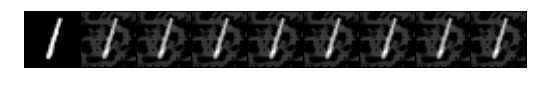

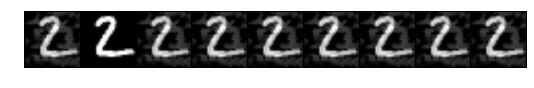

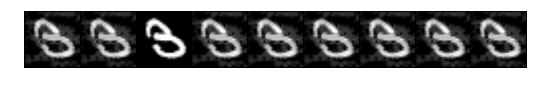

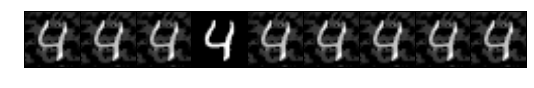

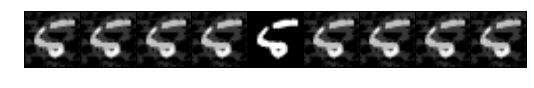

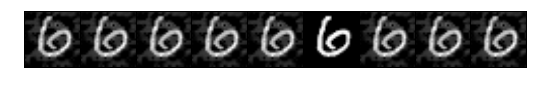

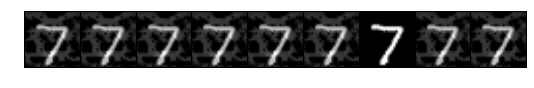

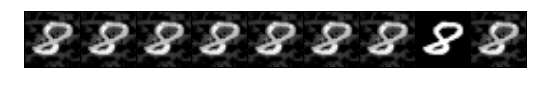

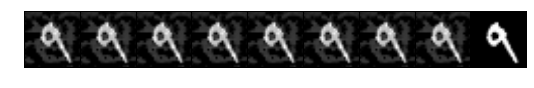

In [31]:
G,target=Targetedviz('C',"white",targetclass='0')

5


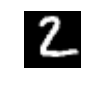

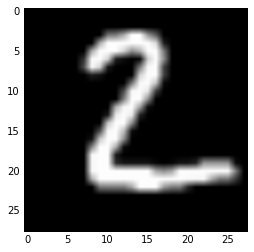

In [29]:
print(targeted_labels[1][1])
X_testout=X_test.reshape(10000,28,28)
pyplot.imshow(X_testout[1,:,:],cmap="Greys_r")
pyplot.show()
#print(tempx[targeted_labels[5][0],:,:].reshape(28,28))
pyplot.imshow(X_testout[1,:,:], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [30]:
print(X_test.shape)

(10000, 28, 28, 1)
